In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def read_data():
    file = open("final_project_point_cloud.fuse", "r")
    data = [f.split() for f in file]
    file.close()
    for d in data:
        for i in range(4):
            d[i] = float(d[i])
    return data

In [3]:
data = read_data()


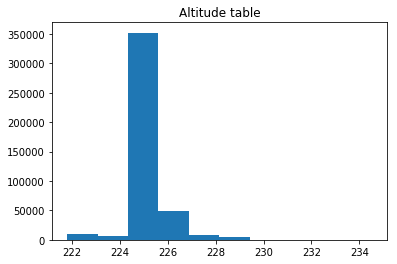

In [4]:
x, y, z, intensity = np.array(data).T
label = [0] * len(x)
fig = plt.figure()
plt.title('Altitude table')
plt.hist(z)
plt.savefig('Altitude.png')
plt.show()

In [5]:
print(min(x), max(x), min(y), max(y))

45.90329572 45.90487933 11.02701384 11.02965733


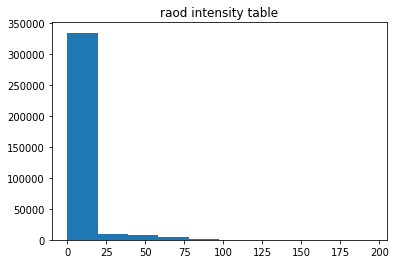

In [6]:
z_range = max(z) - min(z)
median = np.median(z)
min_z = median - 0.05 * z_range
max_z = median + 0.05 * z_range
horizon_data = []
for i in range(len(data)):
    if min_z < data[i][2] < max_z:
        horizon_data.append(data[i] + [i])
horizon_x, horizon_y, horizon_z, horizon_intensity, index = np.array(horizon_data).T
plt.title('raod intensity table')
plt.hist(horizon_intensity)
plt.savefig('road_intensity.png')
plt.show()

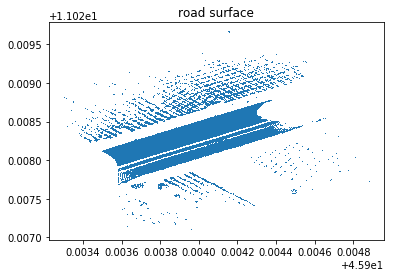

In [7]:
plt.plot(horizon_x, horizon_y, ',')
plt.title('road surface')
plt.savefig('road.png')
plt.show()

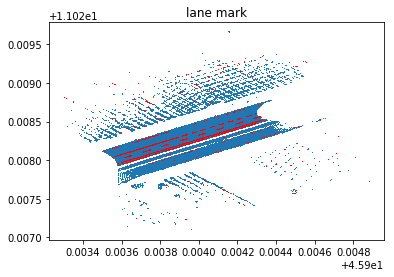

In [8]:
lane_mark = []
for d in horizon_data:
    if d[3] >= 57 and d[3] <= 79:
        lane_mark.append(d)
lane_x, lane_y, lane_z, lane_intensity, index = np.array(lane_mark).T
plt.title('lane mark')
plt.plot(horizon_x, horizon_y, ',')
plt.plot(lane_x, lane_y, ',', color = "red")
plt.savefig('lane_mark.png')
plt.show()

In [9]:
kmeans = KMeans(max_iter = 10000, n_clusters = 4)
data_for_fit = np.array(lane_mark)[:,:3]
kmeans.fit(data_for_fit)
labels = kmeans.labels_

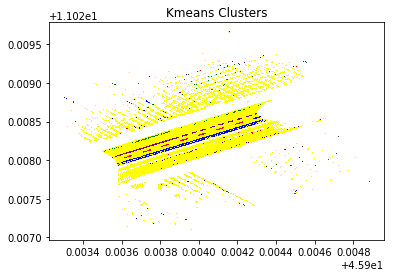

In [11]:
lane_0, lane_1, lane_2, lane_3 = [], [], [], []
for i in range(len(labels)):
    if labels[i] == 0:
        lane_0.append(lane_mark[i])
    elif labels[i] == 1:
        lane_1.append(lane_mark[i])
    elif labels[i] == 2:
        lane_2.append(lane_mark[i])
    else:
        lane_3.append(lane_mark[i])
lane_0_x, lane_0_y, lane_0_z, lane_0_intensity, lane_0_index = np.array(lane_0).T
lane_1_x, lane_1_y, lane_1_z, lane_1_intensity, lane_1_index= np.array(lane_1).T
lane_2_x, lane_2_y, lane_2_z, lane_2_intensity, lane_2_index = np.array(lane_2).T
lane_3_x, lane_3_y, lane_3_z, lane_3_intensity, lane_3_index = np.array(lane_3).T
# fig = plt.figure(figsize = (40, 30))
plt.title('Kmeans Clusters')
plt.plot(horizon_x, horizon_y, ',', color = "yellow")
plt.plot(lane_0_x, lane_0_y, ',', color = "red")
plt.plot(lane_1_x, lane_1_y, ',', color = "green")
plt.plot(lane_2_x, lane_2_y, ',', color = "blue")
plt.plot(lane_3_x, lane_3_y, ',', color = "purple")
plt.savefig('kmeans.png')
plt.show()

In [12]:
lane0RANSAC = linear_model.RANSACRegressor(base_estimator = linear_model.LinearRegression())
lane0RANSAC.fit(lane_0_x.reshape(-1, 1), lane_0_y.reshape(-1, 1))
lane_0_inlier_mask = list(lane0RANSAC.inlier_mask_)
length_0 = len(lane_0)
i = 0
while i < length_0:
    if not lane_0_inlier_mask[i]:
        lane_0.pop(i)
        lane_0_inlier_mask.pop(i)
        length_0 -= 1
        i -= 1
    i += 1

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


In [13]:
lane1RANSAC = linear_model.RANSACRegressor(base_estimator = linear_model.LinearRegression())
lane1RANSAC.fit(lane_1_x.reshape(-1, 1), lane_1_y.reshape(-1, 1))
lane_1_inlier_mask = list(lane1RANSAC.inlier_mask_)
length_1 = len(lane_1)
i = 0
while i < length_1:
    if not lane_1_inlier_mask[i]:
        lane_1.pop(i)
        lane_1_inlier_mask.pop(i)
        length_1 -= 1
        i -= 1
    i += 1

In [14]:
lane2RANSAC = linear_model.RANSACRegressor(base_estimator = linear_model.LinearRegression())
lane2RANSAC.fit(lane_2_x.reshape(-1, 1), lane_2_y.reshape(-1, 1))
lane_2_inlier_mask = list(lane2RANSAC.inlier_mask_)
length_2 = len(lane_2)
i = 0
while i < length_2:
    if not lane_2_inlier_mask[i]:
        lane_2.pop(i)
        lane_2_inlier_mask.pop(i)
        length_2 -= 1
        i -= 1
    i += 1

In [15]:
lane3RANSAC = linear_model.RANSACRegressor(base_estimator = linear_model.LinearRegression())
lane3RANSAC.fit(lane_3_x.reshape(-1, 1), lane_3_y.reshape(-1, 1))
lane_3_inlier_mask = list(lane3RANSAC.inlier_mask_)
length_3 = len(lane_3)
i = 0
while i < length_3:
    if not lane_3_inlier_mask[i]:
        lane_3.pop(i)
        lane_3_inlier_mask.pop(i)
        length_3 -= 1
        i -= 1
    i += 1

In [16]:
whole_lane_mark =  lane_0 + lane_1 + lane_2 + lane_3

In [17]:
whole_lane_mark_x, whole_lane_mark_y, whole_lane_mark_z, whole_lane_mark_intensity, whole_lane_mark_index = np.array(whole_lane_mark).T

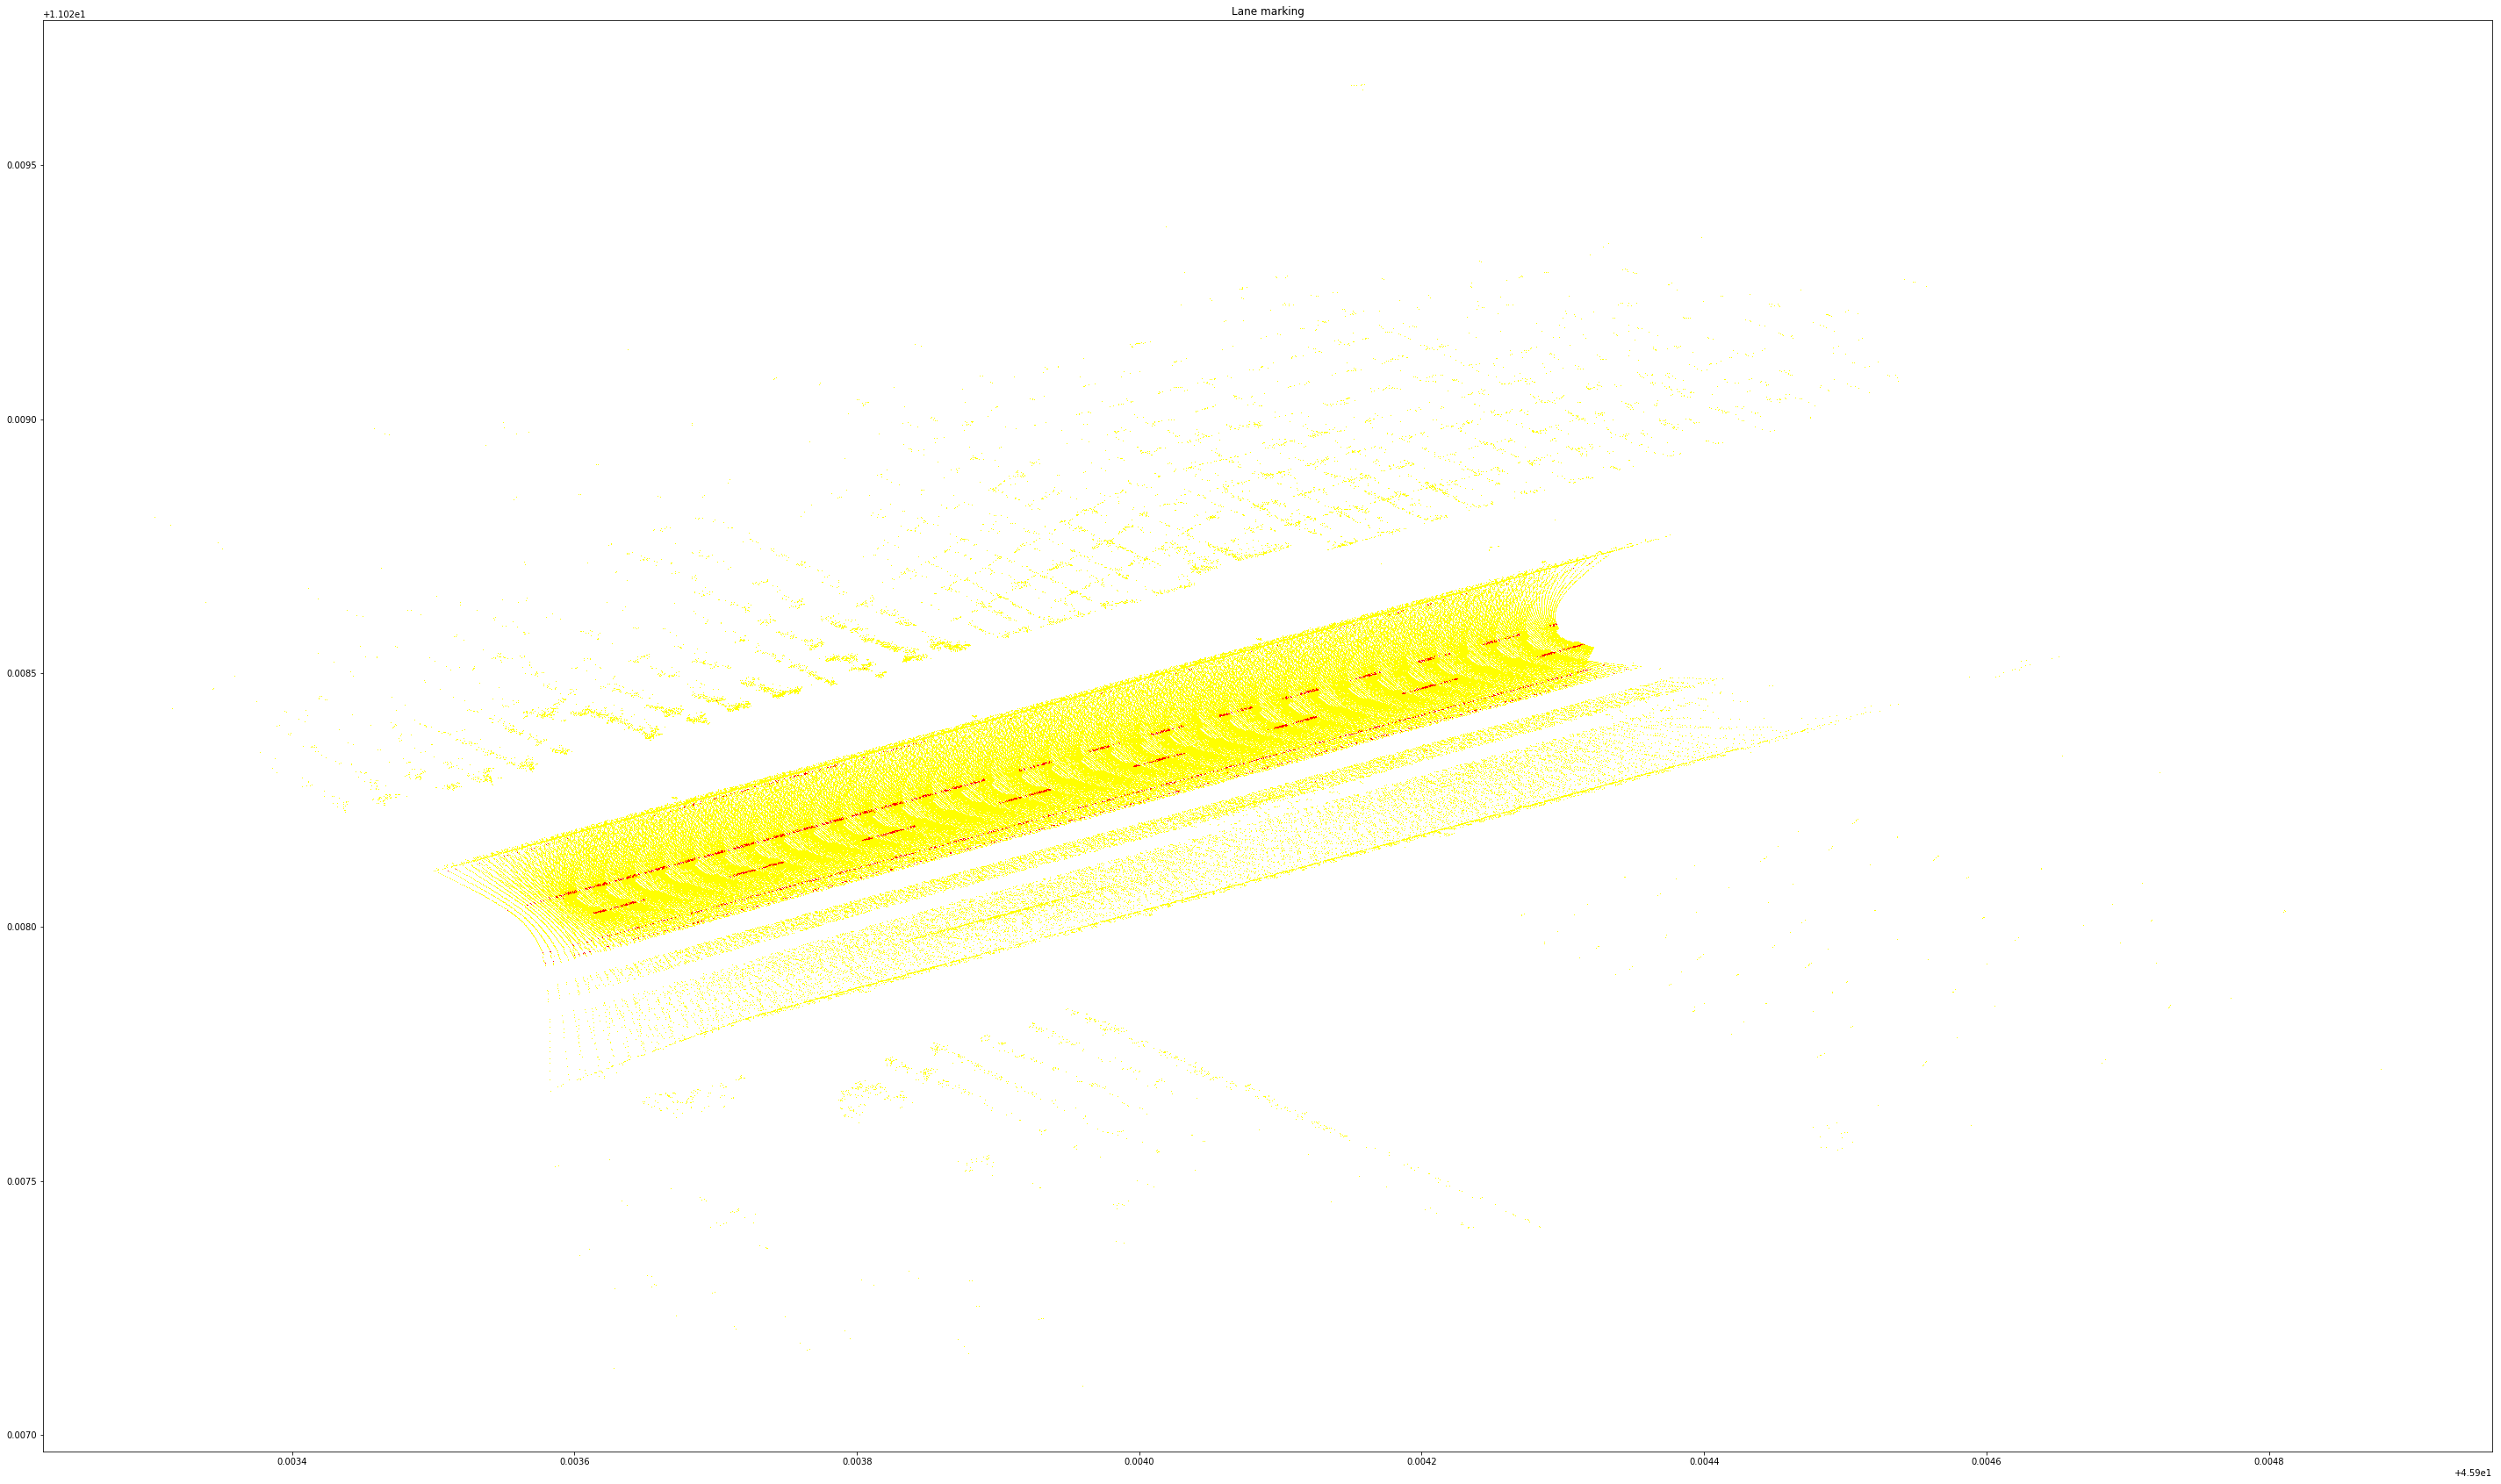

In [18]:
fig = plt.figure(figsize = (50, 30))
plt.plot(horizon_x, horizon_y, ',', color = "yellow")
plt.plot(whole_lane_mark_x, whole_lane_mark_y, ',', color = "red")
plt.title('Lane marking')
plt.savefig('output.png')
plt.show()

In [19]:
for mark in whole_lane_mark:
    label[mark[4]] = 1

In [20]:
print(len([l for l in label if l]))

4279


In [21]:
import pandas as pd
parameters = {'latitude': x, 'longitude':y, 'altitude':z, 'intensity':intensity}
X = pd.DataFrame(data = parameters)
labels = {'label':label}
Y = pd.DataFrame(data = labels)

In [22]:
train, test = [], []
for i in range(len(x)):
    if x[i] + y[i] > 56.93189317:
        train.append(i)
    else:
        test.append(i)
train, test = pd.Int64Index(data = train), pd.Int64Index(data = test)

In [23]:
from sklearn.svm import SVC
clf = SVC(C = 30, kernel = "rbf")
# clf = linear_model.LogisticRegression(penalty = 'l2', C = 0.0001, solver = 'sag')
clf.fit(X.iloc[train], Y.iloc[train])

/Users/jingchengdeng/Library/Python/3.6/lib/python/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingchengdeng/Library/Python/3.6/lib/python/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=30, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_predict = clf.predict(X.iloc[test])

In [25]:
y_predict

array([0, 0, 0, ..., 0, 0, 0])

In [26]:
x_train, x_test, y_train, y_test = X.iloc[train], X.iloc[test], Y.iloc[train], Y.iloc[test]

In [27]:
sum(y_test['label'] == 1)

1158

In [28]:
P = 0
TP = 0
FP = 0
FN = 0
N = 0
i = 0
for index, row in y_test.iterrows():
    if row['label'] == y_predict[i] == 1:
        TP += 1
    elif row['label'] == 1 and y_predict[i] == 0:
        FN += 1
    elif row['label'] == 0 and y_predict[i] == 1:
        FP += 1
    if row['label'] == 1:
        P += 1
    if row['label'] == 0:
        N += 1
    i += 1
print(TP, FP, FN, P, N)

1158 27 0 1158 84219


In [29]:
recall = TP / (TP + FN)
precision = TP / (TP + FP)
f1 = (2 * precision * recall) / (precision + recall)
f1

0.9884763124199745

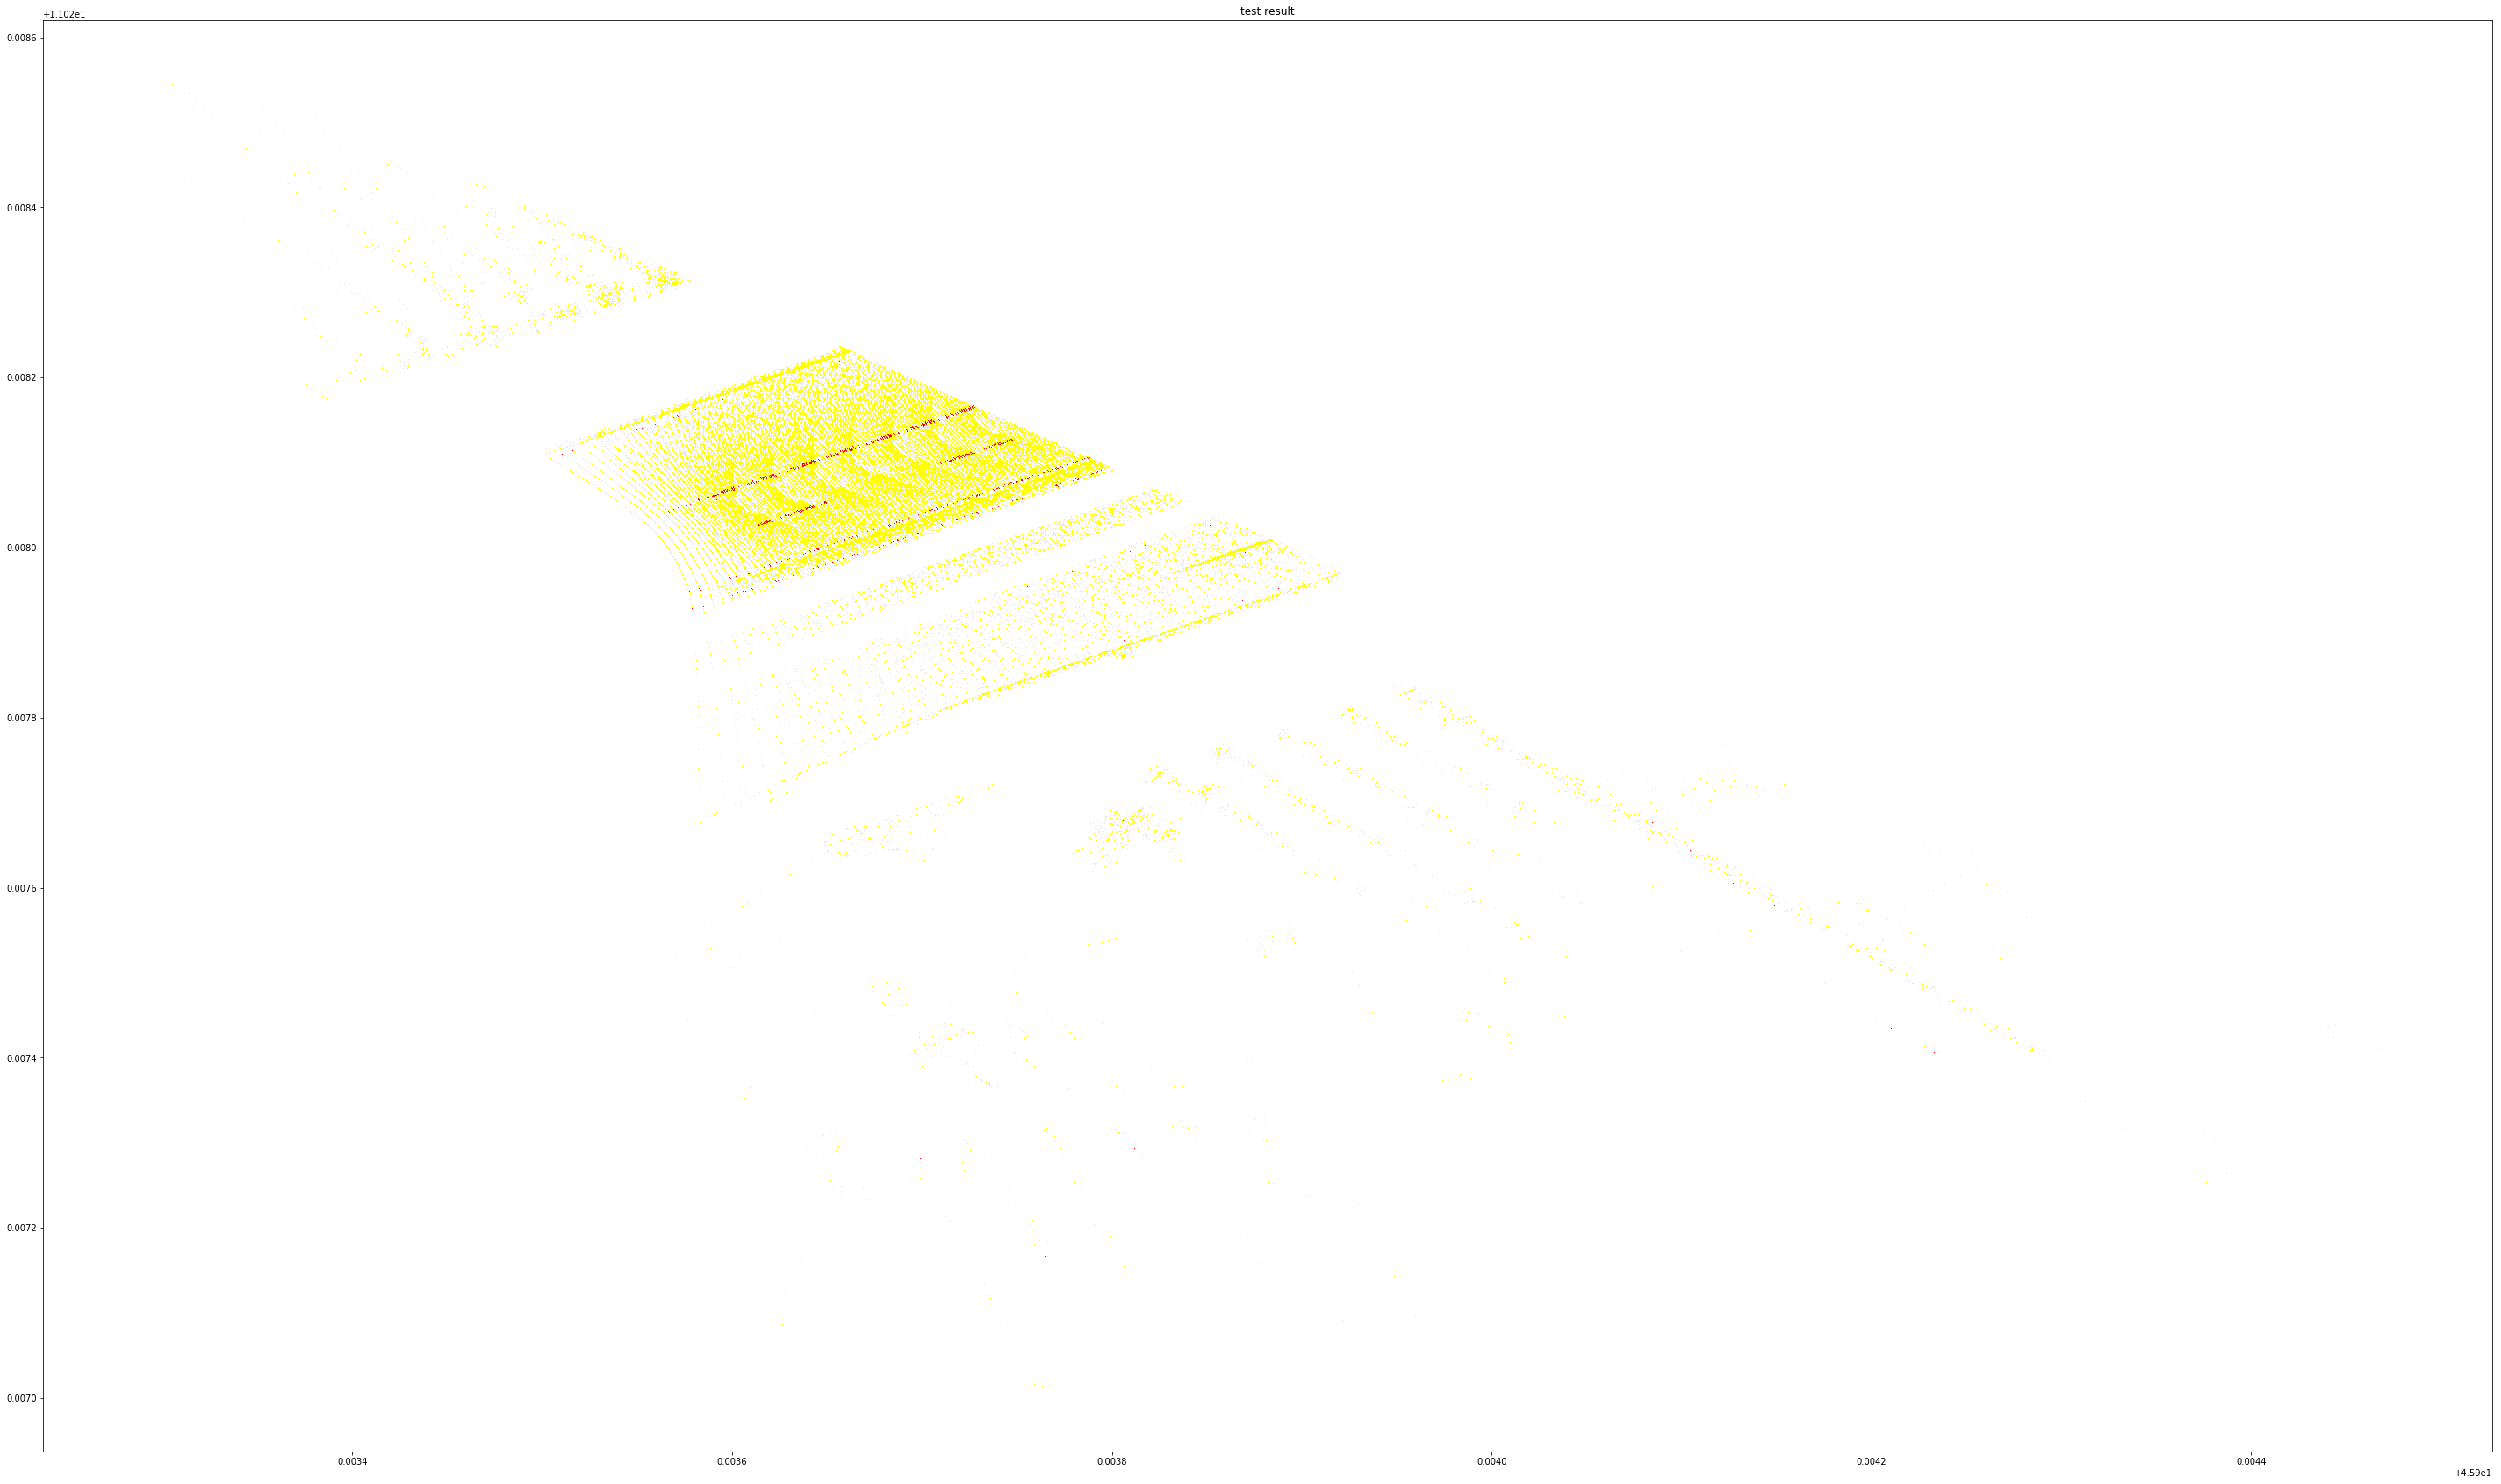

In [30]:
fig = plt.figure(figsize = (50, 30))
# ax = plt.axes(projection = '3d')
# ax.set_xlim(min(horizon_x), max(horizon_x))
# ax.set_ylim(min(horizon_y), max(horizon_y))
# ax.set_zlim3d(min(z), max(z))
plt.title('test result')
plt.plot(x_test[y_predict == False]['latitude'], x_test[y_predict == False]['longitude'], ',', color = "yellow")
plt.plot(x_test[y_predict == True]['latitude'], x_test[y_predict == True]['longitude'], ',', color = "red")
plt.savefig('test.png')
plt.show()